In [1]:
# import zipfile

In [2]:
# ref = zipfile.ZipFile('archive.zip')
# ref.extractall(os.path.join('data'))
# ref.close()

In [3]:
from tensorflow import keras

In [4]:
train = keras.utils.image_dataset_from_directory(
    directory='Ignored/Data_PROCESSED/Train',
    label_mode='int',
    batch_size=32,
    image_size=(256 ,256),
    labels='inferred'
)

Found 2592 files belonging to 2 classes.


In [5]:
test = keras.utils.image_dataset_from_directory(
    directory='Ignored/Data_PROCESSED/Test',
    label_mode='int',
    batch_size=32,
    image_size=(256 ,256),
    labels='inferred'
)

Found 264 files belonging to 2 classes.


In [6]:
val = keras.utils.image_dataset_from_directory(
    directory='Ignored/Data_PROCESSED/Validation',
    label_mode='int',
    batch_size=32,
    image_size=(256 ,256),
    labels='inferred'
)

Found 144 files belonging to 2 classes.


In [7]:
import tensorflow as tf

In [8]:
from keras import Sequential
from keras.layers import Dense , Conv2D , Flatten  , BatchNormalization , MaxPool2D

In [9]:
model = Sequential()

model.add(Conv2D(64 , kernel_size= (3,3) , strides=(2,2) , padding='same' , input_shape = (256,256,3) , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides= (2,2) , padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128 , kernel_size= (3,3) , strides=(2,2) , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides= (2,2) , padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(256 , kernel_size= (3,3) , strides=(2,2) , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides= (2,2) , padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(512 , kernel_size= (3,3) , strides=(2,2) , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=(2,2) , strides= (2,2) , padding='same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512 , activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(256 , activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(128 , activation='relu' , kernel_initializer='he_uniform'))
model.add(Dense(64 , activation='relu' , kernel_initializer='he_uniform'))


model.add(Dense(1 , activation='sigmoid' , kernel_initializer='he_uniform'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                        

In [11]:
model.compile(optimizer='adam' , loss=tf.losses.binary_crossentropy , metrics=['accuracy'])

In [12]:
history = model.fit(train,validation_data=test , epochs= 10)

Epoch 1/10


81/81 [==============================] - 12s 129ms/step - loss: 0.4607 - accuracy: 0.8005 - val_loss: 1.0959 - val_accuracy: 0.7538
Epoch 2/10
81/81 [==============================] - 9s 113ms/step - loss: 0.2288 - accuracy: 0.9047 - val_loss: 0.3249 - val_accuracy: 0.8712
Epoch 3/10
81/81 [==============================] - 9s 110ms/step - loss: 0.1562 - accuracy: 0.9417 - val_loss: 0.2722 - val_accuracy: 0.9053
Epoch 4/10
81/81 [==============================] - 9s 111ms/step - loss: 0.1051 - accuracy: 0.9622 - val_loss: 0.2677 - val_accuracy: 0.9091
Epoch 5/10
81/81 [==============================] - 9s 112ms/step - loss: 0.0643 - accuracy: 0.9749 - val_loss: 0.7303 - val_accuracy: 0.8220
Epoch 6/10
81/81 [==============================] - 10s 119ms/step - loss: 0.0781 - accuracy: 0.9745 - val_loss: 0.1388 - val_accuracy: 0.9394
Epoch 7/10
81/81 [==============================] - 10s 123ms/step - loss: 0.0511 - accuracy: 0.9819 - val_loss: 0.2465 - val_accuracy: 0.9356
E

In [13]:
model.save('Trained_model')

INFO:tensorflow:Assets written to: Trained_model\assets


INFO:tensorflow:Assets written to: Trained_model\assets


In [14]:
import matplotlib.pyplot as plt

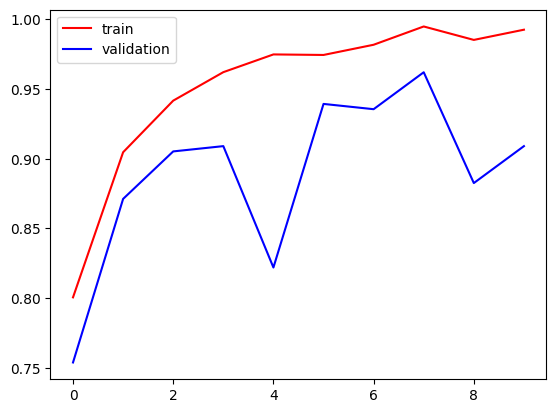

In [15]:
plt.plot(history.history['accuracy'] , color = 'red' , label = 'train')
plt.plot(history.history['val_accuracy'] , color = 'blue' , label = 'validation')
plt.legend()
plt.show()